# DSCI 521: Data Analysis and Interpretation <br> Phase 1 Report: Investigating the Impact of Weather Patterns <br> and Extreme Weather Events on Community Economic Health

### Phase 1 report checklist
Here's a checklist of items that you _absolutely_ should include:

1. [ ] a background report on the team's members, their self-identified skills, and individual contributions
- [ ] a discussion of what you would like to your analysis to do, who/what it will support
- [ ] an exhibition of analyses from dataset(s) explored, including visual analyses, captions, and useful descripitions
- [ ] a discussion of who might be interested in your analysis
- [ ] a discussion of how your analysis might fit into an application or investigation
- [ ] a discussion of how your analysis is limited and could be improved
- [ ] a selection of data for continued analysis, including justification
- [ ] a discussion of how your analysis might be completed and disseminated, i.e., who's the target audience?

_Note_: These are not exhaustive lists of topics or tasks worth covering in your project. In general, if there's something interesting about your project, whether relating to the source data's construction, existence, or novelty of the tergeted tools and applications, or _anything else_, then be sure to document it!

## Group 3 Team Members

### Navneet Singh

I bring product management experience and a business background to the team. I used Excel in my role as a product manager to gather and keep track of pricing information as well as product dimensions. Power BI was especially useful to compare year after year sales as well as comparing our products to our competitors in a visual aspect. To share my findings, I would put together my analysis in a powerpoint and present with the rest of my team. Currently, I am learning Python and developing my skills in data preprocessing and extraction, so this project is a fantastic opportunity for me to grow in these areas. My goal is to help the team stay organized, make practical connections from the data, and ensure our findings are engaging and impactful.

### Ian Auger

My name is Ian Auger, and my background is deeply rooted in the food industry, where I spent nearly a decade working in and managing restaurants. After transitioning out of the restaurant space, I spent the past six years working in food technology companies, initially in Operations and Strategy, and more recently as a Data Analyst.

My expertise lies in relational databases, querying languages, data analysis, and data visualization, as these have been core responsibilities in my role for the past four years. While I am growing more proficient in object-oriented programming languages like Python and Java, my strongest skill is SQL.

From an industry perspective, I have worked with both D2C e-commerce companies and food delivery platforms, giving me exposure to a variety of operational and product challenges. This experience has fostered a strong sense of adaptability and problem-solving.

Moving forward, I want to strengthen my proficiency in Python, as it is becoming increasingly critical in my career. Specifically, I aim to:
- Improve my Python skills for data analysis, visualization and modeling.
- Develop a stronger understanding of how to choose and correctly apply analytical frameworks to data.
- Implement, test and measure the effectiveness of machine learning models.

These are foundational skills that I recognize as gaps in my current expertise, and I look forward to addressing them through this project.



## Project Focus

Our analysis aims to explore how weather patterns, particularly extreme weather events, influence community-level economic health. By examining correlations between weather conditions—such as extreme temperatures, precipitation events, and snowfall—and socioeconomic indicators like median household income, employment rates, and educational attainment, we intend to uncover insights useful for policymakers, community planners, public health officials, and economic development agencies. Our findings could inform policies designed to enhance resilience and mitigate adverse economic impacts stemming from climatic events.


## Intended Audience 

For the purpose of this course, our audience is the professor and our classmates. However, in the real world our primary audience would comprise of: 

- Local and regional policymakers: They can use this analysis to inform equitable climate adaptation strategies and allocate resources effectively across vulnerable communities.

- Urban and community planners: Understanding how climate patterns relate to demographic and economic shifts allows planners to make data-driven decisions on infrastructure, zoning, and housing policy.

- Public health departments: Exposure to extreme heat and other weather-related stressors can compound health risks. This analysis helps these departments anticipate population vulnerabilities and plan interventions.

- Emergency management agencies: The ability to identify counties with increased storm activity, heat exposure, or population shifts supports disaster preparedness and response planning.

- Economic development organizations: These groups can leverage this data to understand climate-related barriers to growth, inform regional investment strategies, and advocate for resilience funding.

- Academic researchers focused on climate resilience and socioeconomic impacts: This dataset provides a rich panel of climate, demographic, and economic variables over time, supporting studies on adaptation, inequality, and mobility.



## Potential Applications

Insights gained from our analysis have significant potential for practical application, including:

- Informing targeted policy interventions and resource allocation aimed at economic resilience.
- Enhancing emergency preparedness and mitigation strategies for regions disproportionately affected by extreme weather.
- Supporting strategic community planning efforts focused on sustainability and economic stability.


## Data Sources and Collection Methodology

### Overview: Using Google BigQuery Public Datasets

For this project, we utilized Google BigQuery’s Public Datasets. This enabled efficient access to complex, multi-year datasets without the need to download and manually store large CSVs locally. By querying these datasets directly using SQL, we could selectively extract only the fields and timeframes necessary for our analysis, dramatically streamlining preprocessing.

We used four main data sources in this project, each serving a distinct analytical purpose:

#### 1. American Community Survey (ACS)
**Dataset:** bigquery-public-data.census_acs

**Purpose:** Provides detailed county-level demographic and socioeconomic information, including median income, educational attainment, population counts by race and ethnicity, and housing/rent burden indicators.

**Key Features Used:**

- median_income, median_age, total_pop
- Educational attainment by age group
- Rent burden metrics (e.g., median rent, % income spent on rent)
- Mobility indicators such as population living in a different house one year ago

Years Extracted: 2010–2020

Granularity: County-year level

#### 2. NOAA GSOD (Global Summary of the Day)
**Dataset:** bigquery-public-data.noaa_gsod

**Purpose:** Daily weather records including temperature, precipitation, and extreme conditions such as high heat days and severe wind speeds.

**Key Features Extracted:**

- stn, wban (station identifiers)
- year, mo, da (date components)
- temp – Mean daily temperature (°F)
- max – Maximum recorded daily temperature (°F)
- prcp – Daily precipitation total (inches)
- hail, thunder, tornado_funnel_cloud – Binary flags for extreme weather indicators

Years Extracted: 2000–2024 

Granularity: Daily station-level data

#### 3. NOAA Severe Weather Events Database
**Dataset:** bigquery-public-data.noaa_historic_severe_storms

**Purpose:** Details about individual storm events (tornadoes, floods, wildfires, etc.) including damage costs, fatalities, and injuries.

**Key Features Extracted:**

- state_fips_code, cz_fips_code – FIPS codes used to derive county-level geo_id
- event_type – Categorical type of weather event
- event_begin_time – Timestamp used to derive year and quarter
- injuries_direct, injuries_indirect
- deaths_direct, deaths_indirect
- damage_property, damage_crops – Economic damage values in USD

Years Extracted: 2000–2024

Granularity: Summary statistics per quarter by county

#### 4. NOAA Weather Station Metadata
**Dataset:** bigquery-public-data.noaa_gsod.stations

**Purpose:** Used to associate daily GSOD weather records with U.S. counties via geographic coordinates.

**Key Features Extracted:**

- usaf, wban – Primary station identifiers
- lat, lon – Geographic coordinates used for spatial mapping to counties
- begin, end – Operational date range for each station
- name, state, country – Station name and administrative info

Granularity: One row per station

## Constructing the Final Dataset

Our objective was to build a county-level, quarterly panel dataset that aligns climate and severe weather trends with socioeconomic indicators. This would allow downstream modeling of the relationship between climate volatility and community-level characteristics such as income, rent burden, and population mobility.

### Target Dataset Structure
Each row in the final dataset represents a unique (county, year, quarter) combination and contains:

- Quarterly weather summaries (temperature, precipitation, extreme heat days)
- Severe weather impacts (event counts, damage, injuries, deaths)
- County demographic and housing indicators from ACS
- Quarter and year identifiers to enable temporal analysis
- County geometries for mapping and spatial analysis

### Key Steps to Dataset Construction

#### 1. Aggregate GSOD Daily Weather to Station–Quarter Level

- Parsed large CSVs in chunks (1M rows)
- Derived quarterly averages (e.g. avg_temp, heat_days_90F)
- Exported to gsod_quarterly_aggregates.csv

#### 2. Spatially Join Stations to Counties

- Converted station lat/lon to geometries
- Used county shapefiles to determine which stations fell within which counties
- Preserved county FIPS and geometry for spatial joins

#### 3. Aggregate Weather Data to County–Quarter Level

- Averaged climate metrics across all stations reporting in a county-quarter
- Retained reporting_stations as a coverage indicator

#### 4. Aggregate Severe Storm Events to County–Quarter Level

- Counted storm types and summed damages/injuries/fatalities
- Pivoted to wide format (e.g. total_deaths_flood)
    - Preserved data structure for single row aligning with Year, Quarter, County aggregation
- Merged with county FIPS

#### 5. Integrate ACS Demographic Data

- Joined annual ACS records (2010–2020) to quarterly climate data
- Used geo_id + year as keys
- Imputed or flagged nulls where ACS data was not available

#### 6. Final Merge and Dataset Output

Created two versions:

- Added a has_acs flag to distinguish usable rows for regression tasks
- county_weather_acs_training.csv (only rows with ACS data — for modeling)
- county_weather_acs_complete.csv (full panel, includes 2000–2024)


## Exploratory Data Analysis (EDA)

The purpose of this section is to build familiarity with the structure and distribution of key variables in our merged dataset. We explore demographic, socioeconomic, and climate-related features to identify underlying patterns, trends over time, and possible data quality issues. This exploratory work is critical for informing downstream modeling decisions, including feature engineering, data transformation, and missing value treatment.

The plots and descriptive summaries below provide an overview of population sizes, income distributions, temperature patterns across quarters, and the frequency of extreme weather events. These insights help us validate assumptions about the data and guide the design of our predictive framework.


In [13]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("Proposal Data")

dtype_dict = {
    "geo_id": str
}

training_data = pd.read_csv(DATA_DIR / "county_weather_acs_training.csv",  dtype=dtype_dict)

print("Data Info:\n", training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66600 entries, 0 to 66599
Data columns (total 84 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   geo_id                                   66600 non-null  object 
 1   county_name                              66600 non-null  object 
 2   year                                     66600 non-null  int64  
 3   quarter                                  66600 non-null  int64  
 4   county_geometry                          66600 non-null  object 
 5   avg_temp                                 66600 non-null  float64
 6   max_temp                                 66600 non-null  float64
 7   total_precip                             66600 non-null  float64
 8   heat_days_90F                            66600 non-null  float64
 9   hail_days                                66600 non-null  float64
 10  thunder_days                             66600

### Data Shape

The dataset currently presents in a relatively wide format, primarily due to the stratification of severe storm events — a result of pivoting the storm data by event type and metric. This structure enables us to retain fine-grained detail about the specific impacts of different hazards, such as floods, wildfires, and tornadoes, compared to comparatively lower-risk events like hail or rip currents.

While this level of granularity is valuable for exploratory analysis, we anticipate that dimensionality reduction or aggregation may be necessary downstream, especially for modeling tasks. A correlation analysis and feature importance review will guide decisions about which variables to retain, collapse, or transform in the final modeling dataset.

For now, the dataset’s structure is purposefully wide to ensure no meaningful signal is lost during the initial phases of analysis.

In [14]:
# Count the number of unique counties in the training data
print("Unique geo_id count:", training_data["geo_id"].nunique())      

Unique geo_id count: 1659


### County Representation

The dataset includes approximately half of all U.S. counties. This reduced coverage is attributable to two key factors:

ACS Coverage Limitations:
While the American Community Survey (ACS) 5-Year Estimates provide the most comprehensive demographic coverage available, they may still omit the most sparsely populated rural counties due to sampling limitations and data suppression protocols designed to protect privacy and ensure reliability.

NOAA Station Constraints:
Our weather and storm data are sourced from NOAA stations, and our final merged dataset includes only counties that contain at least one NOAA GSOD reporting station. Since not every U.S. county hosts a station within its geographic boundary, this filtering step further reduces the total number of counties represented.

This limitation is important to keep in mind when interpreting findings. While the dataset still covers a diverse and geographically distributed set of counties, it may underrepresent regions with low population density or limited observational infrastructure.

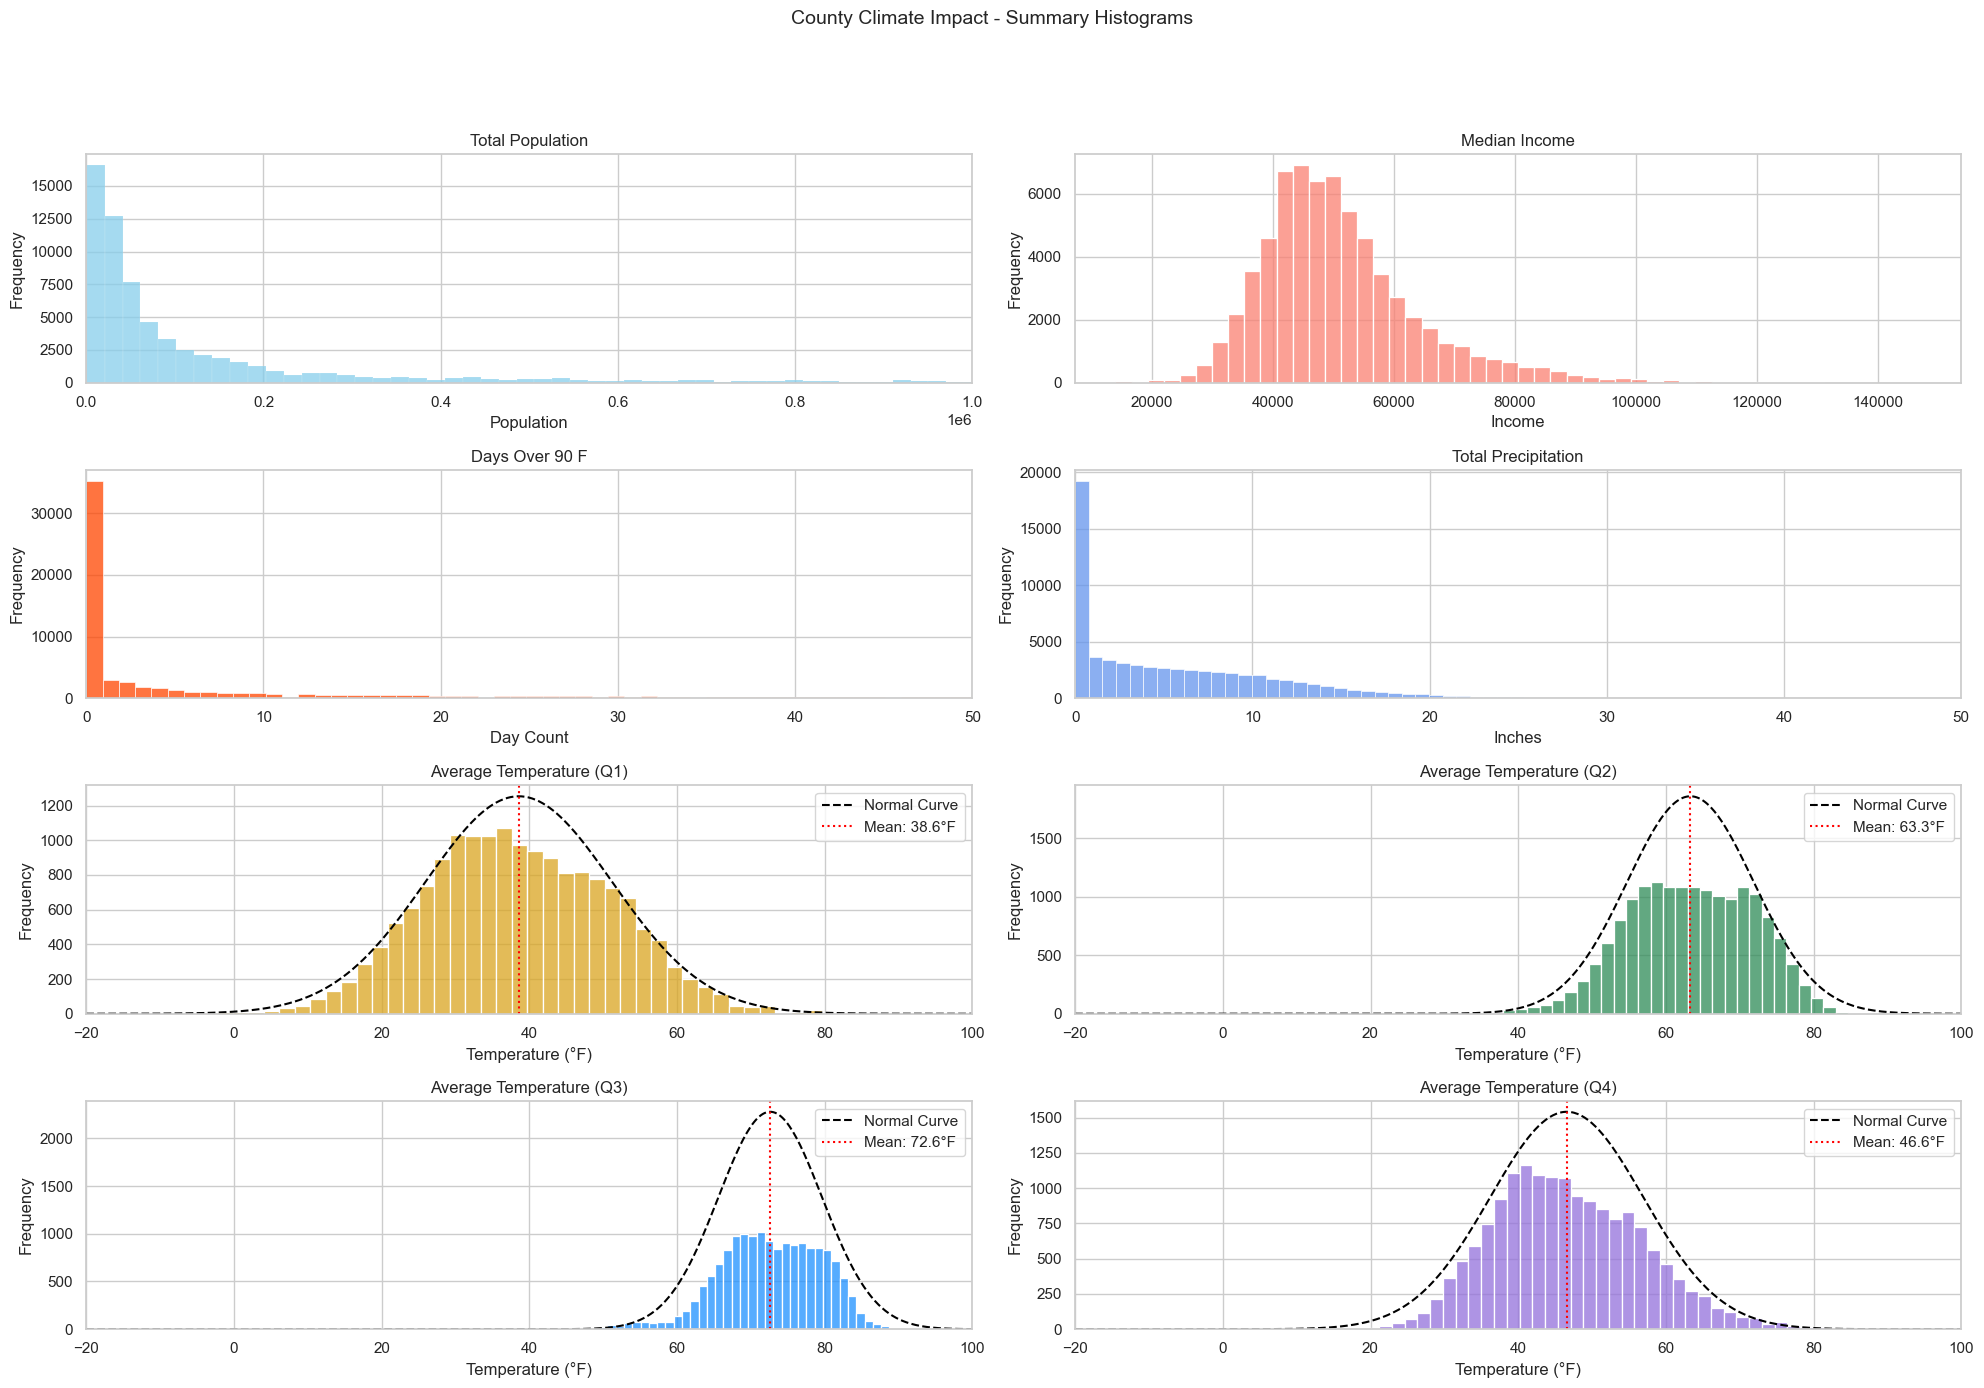

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
from scipy.stats import norm    

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(4,2, figsize=(20,14))
fig.suptitle("County Climate Impact - Summary Histograms", fontsize=14, y=1.02)

sns.histplot(training_data["total_pop"], bins=500,  ax=axs[0,0], color="skyblue")
axs[0,0].set_title("Total Population")
axs[0,0].set_xlabel("Population")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_xlim(0,1_000_000)

sns.histplot(training_data["median_income"], bins=50,  ax=axs[0,1], color="salmon")
axs[0,1].set_title("Median Income")
axs[0,1].set_xlabel("Income")
axs[0,1].set_ylabel("Frequency")

sns.histplot(training_data["heat_days_90F"], bins=100,  ax=axs[1,0], color="orangered")
axs[1,0].set_title("Days Over 90 F")
axs[1,0].set_xlabel("Day Count")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim(0,50)

sns.histplot(training_data["total_precip"], bins=100,  ax=axs[1,1], color="cornflowerblue")
axs[1,1].set_title("Total Precipitation")
axs[1,1].set_xlabel("Inches")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_xlim(0,50)

# Define quarter-to-color mapping
colors = {
    1: "goldenrod",
    2: "seagreen",
    3: "dodgerblue",
    4: "mediumpurple"
}

# Loop through quarters for temperature histograms
for i, quarter in enumerate([1, 2, 3, 4]):
    row = i // 2 + 2  # start at row 2
    col = i % 2
    data = training_data[training_data["quarter"] == quarter]["avg_temp"].dropna()

    mean = data.mean()
    std = data.std()
    x_range = np.linspace(-20, 100, 500)
    y_norm = norm.pdf(x_range, mean, std) * len(data) * (120 / 50)  # scale to histogram height

    sns.histplot(data, bins=50, ax=axs[row, col], color=colors[quarter])
    axs[row, col].plot(x_range, y_norm, color="black", linestyle="--", linewidth=1.5, label="Normal Curve")
    axs[row, col].axvline(mean, color="red", linestyle=":", linewidth=1.5, label=f"Mean: {mean:.1f}°F")

    axs[row, col].set_title(f"Average Temperature (Q{quarter})")
    axs[row, col].set_xlabel("Temperature (°F)")
    axs[row, col].set_ylabel("Frequency")
    axs[row, col].set_xlim(-20, 100)
    axs[row, col].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Summary Statistics: Distribution Overview

The plots above provide an overview of key climate and demographic features in our dataset:

- Total Population is heavily right-skewed, with the vast majority of county-quarters representing populations under 250,000. This reflects the inclusion of many rural or suburban counties, rather than being dominated by large metropolitan centers.

- Median Income shows a relatively normal distribution, centered between $45,000–$55,000, suggesting economic comparability across many counties in the sample.

- Days Above 90°F and Total Precipitation are both highly right-skewed, indicating that extreme heat and rainfall events are relatively infrequent but, when they do occur, can be significant in scale.

- Average Temperature (Q1–Q4) is visualized for each quarter individually, showing clear seasonal shifts. Each distribution aligns closely with a normal curve, with the mean temperature increasing from winter (Q1) to summer (Q3), then falling again in Q4. This suggests reasonable temperature variation across counties and validates the quarterly division of climate data.

These initial visualizations help ground our understanding of the dataset’s range, scale, and distribution patterns before proceeding to deeper analysis.

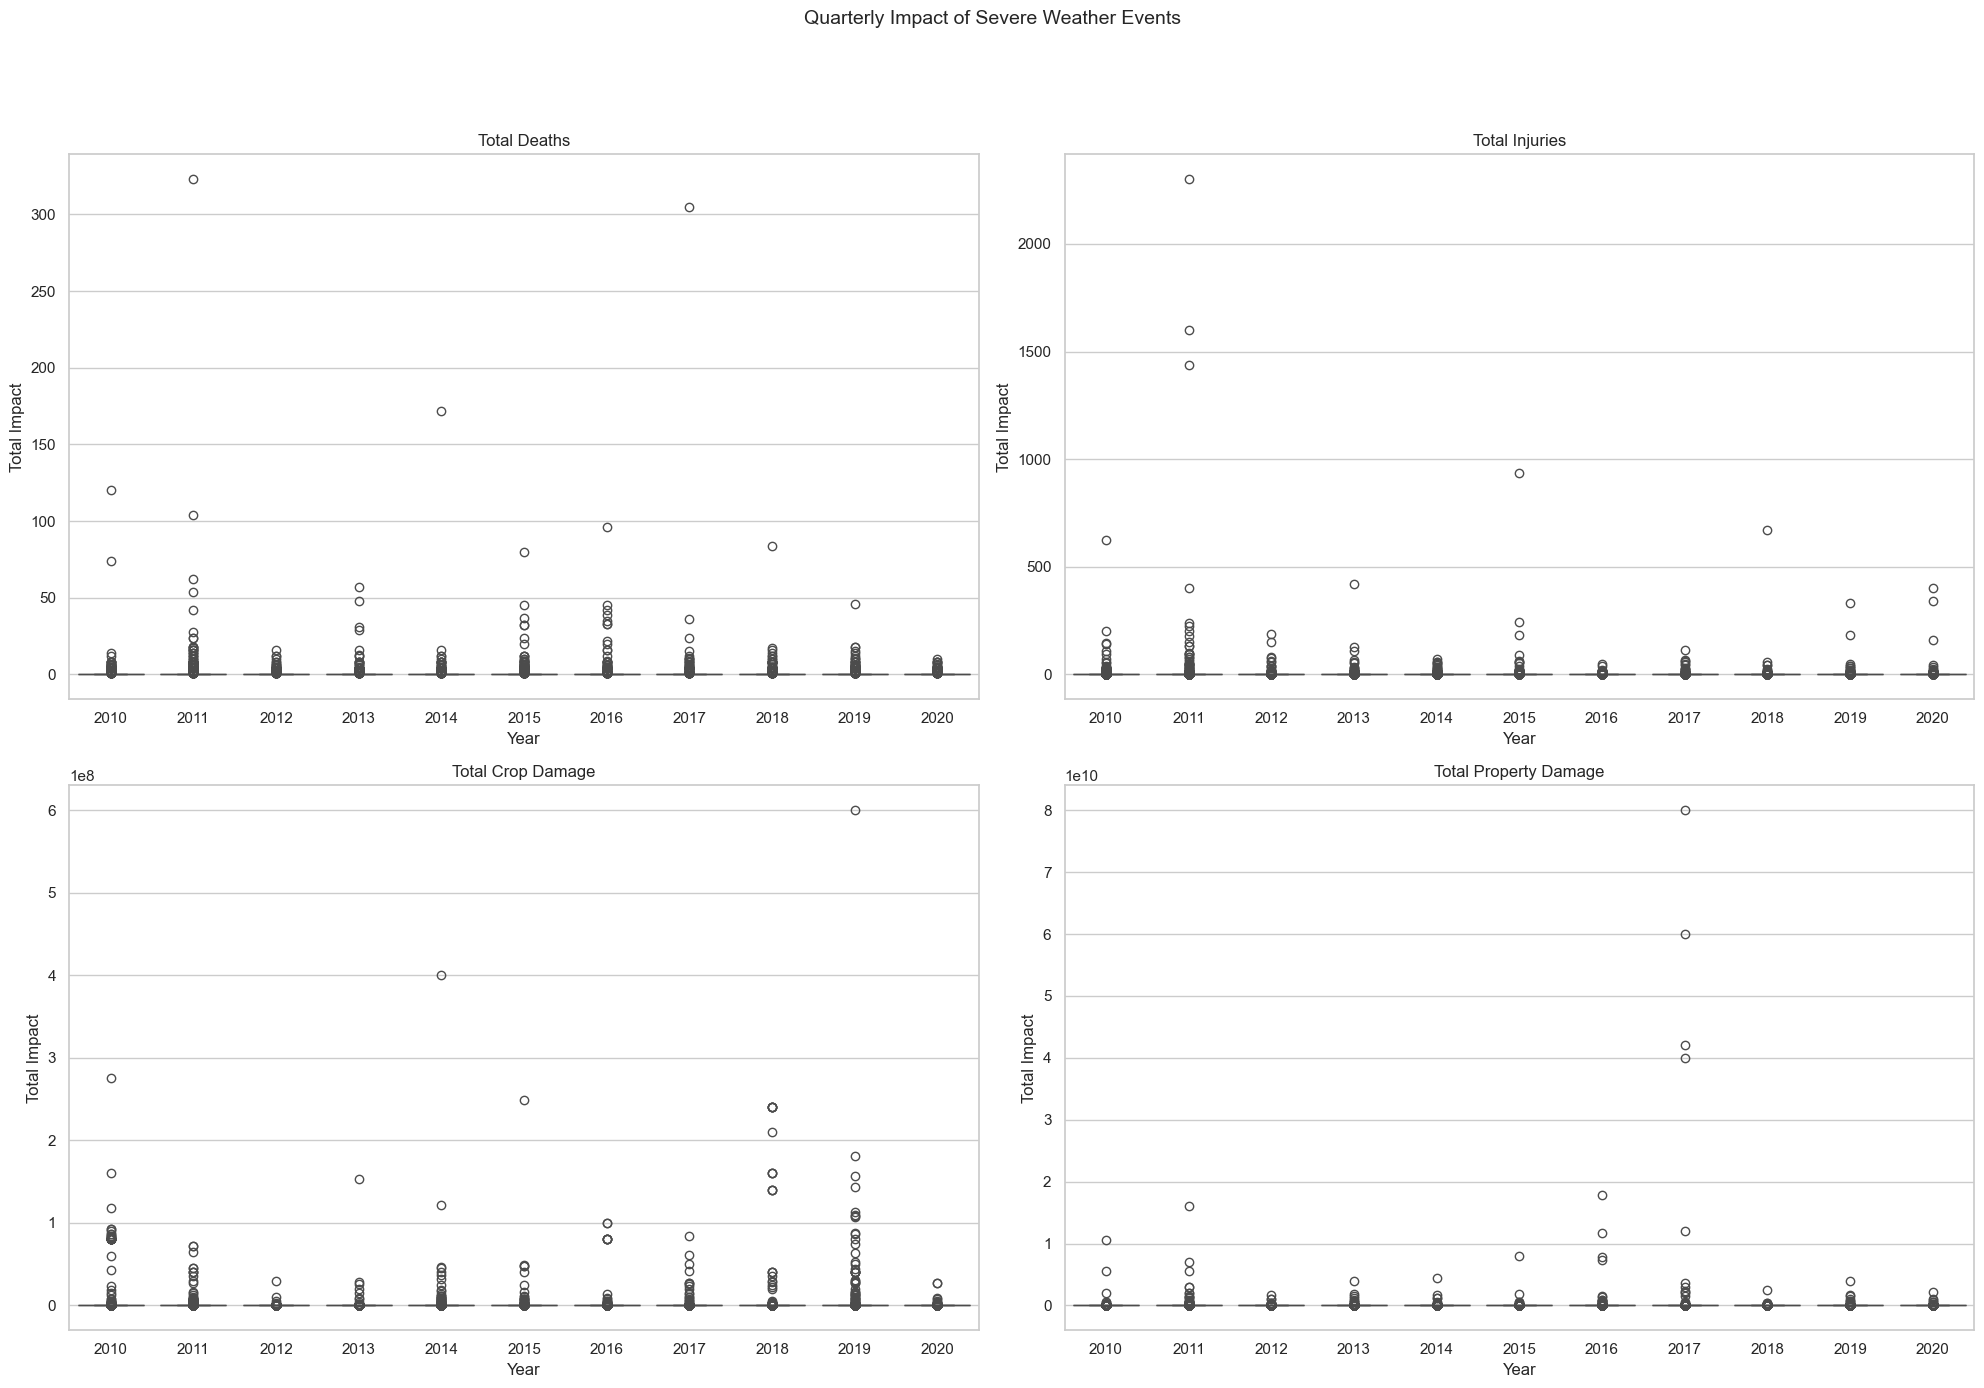

In [25]:
sns.set_theme(style="whitegrid")

impact_metrics = {
    "Total Deaths": [col for col in training_data.columns if "total_deaths_" in col],
    "Total Injuries": [col for col in training_data.columns if "total_injuries_" in col],
    "Total Crop Damage": [col for col in training_data.columns if "total_crop_damage_" in col],
    "Total Property Damage": [col for col in training_data.columns if "total_property_damage_" in col],
}

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Quarterly Impact of Severe Weather Events", fontsize=14, y=1.02)

for ax, (title, cols) in zip(axs.flatten(), impact_metrics.items()):
    training_data[f"{title}_Total"] = training_data[cols].sum(axis=1)
    sns.boxplot(data=training_data, x="year", y=f"{title}_Total", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Impact")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Quarterly Impact of Severe Weather Events
The plots above highlight the scale and frequency of severe weather impacts across U.S. counties between 2010 and 2020, with each point representing a single county-quarter observation:

- Total Deaths & Injuries: Most events result in relatively low human tolls, but the presence of outliers (e.g., >300 deaths or >2,000 injuries) signals the occasional occurrence of highly destructive events, such as major tornado outbreaks or hurricanes.

- Total Crop Damage: While the majority of events incur modest agricultural losses, several quarters show damages exceeding $100 million, underscoring the economic vulnerability of farming regions to climate extremes like floods and droughts.

- Total Property Damage: This category reveals the most extreme outliers, with some quarters seeing damage totals above $5 billion. These spikes likely correspond to landmark disasters such as hurricanes or wildfires affecting dense urban areas.

These distributions show that while many counties experience relatively minor impacts, the tail risk from severe weather events is significant and unevenly distributed. This reinforces the need to account for both frequency and magnitude in downstream modeling of socioeconomic effects.

## TODO: Discuss limitations of dataset and expected challenges
Ian to finish
**Limitations:**
Data mismatches in temporal (annual versus daily) and geographic resolution (county versus station-level).
Ian maybe you could write about here how you decided to group the census data quarterly as we talked about
Regression analysis will highlight correlations rather than establish direct causality.

**Opportunities for Improvement:**
Integrating additional datasets with finer resolution (e.g., municipal-level economic data).
Applying causal inference techniques in future analysis to strengthen conclusions.


## TODO: Opportunities for expansion/improvement of data quality
Nav to finish

## TODO: Correlation 
Ian to finish